# 實驗

要做一個可以逼近 $y=3x^2+1$ 函數的類神經網路

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D


## 要生成的函數

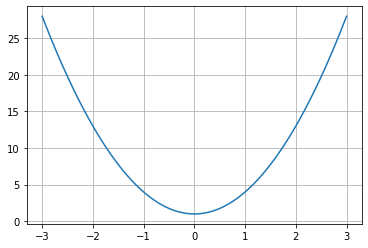

In [7]:
plt.figure()
x = np.linspace(-3, 3, 100)
y = lambda x: 3 * x ** 2 + 1
plt.plot(x, y(x))
plt.grid()
plt.show()


## 產生資料

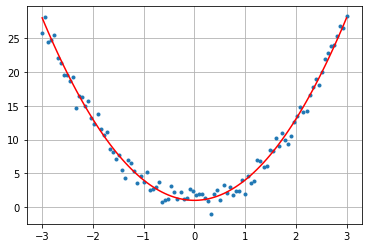

In [8]:
y_noise = y(x) + np.random.randn(100)
plt.plot(x, y_noise, '.')
plt.plot(x, y(x), 'r-')
plt.grid()
plt.show()


## 建一個模型
輸入一個 $x$，產生一個 $y$。兩者的關係可寫成下式
$$ y=ax^2+b $$

先建一層 $y=ax+b$

In [9]:
# y = ax + b
class PolyLayer(keras.layers.Layer):
    def __init__(self, units=1, input_dim=1, name=None):
        super(PolyLayer, self).__init__(name=name)
        a_init = tf.random_normal_initializer()
        
        self.a = tf.Variable(
            initial_value=a_init(shape=(input_dim, units), 
                                 dtype='float32'),
            name='variable_a',
            trainable=True,
        )
        
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), 
                                 dtype='float32'), 
            name='variable_b',
            trainable=True
        )

    def call(self, inputs):
        output = tf.multiply(tf.pow(inputs, 2), self.a) + self.b
        return output


In [31]:
# 驗證自建的層 PolyLayer

layer = PolyLayer()
test_input = [[1.0]]
print(layer(test_input))
print([var.name for var in layer.trainable_variables])
print(layer.get_weights())


tf.Tensor([[-0.13452211]], shape=(1, 1), dtype=float32)
['variable_a:0', 'variable_b:0']
[array([[-0.0644884]], dtype=float32), array([-0.07003372], dtype=float32)]


In [32]:
model = Sequential(name='Try')
model.add(Input(shape=(1, 1)))
model.add(PolyLayer(1, name='test'))

model.summary()        


Model: "Try"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
test (PolyLayer)             (None, 1, 1)              2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [35]:
# def recall(y_true, y_pred):
#     y_true = K.ones_like(y_true) 
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
#     recall = true_positives / (all_positives + K.epsilon())
#     return recall

def custom_loss_function(y_true, y_pred):
    squared_difference = tf.square(y_true[0:2] - y_pred[0:2])
    return tf.reduce_mean(squared_difference, axis=-1)

# model.compile(optimizer='adam', loss=custom_loss_function)

In [36]:
# model.compile(loss='MeanAbsoluteError',
#               optimizer='sgd',
#               metrics=['mse', recall])

model.compile(loss=custom_loss_function,
              optimizer='sgd',
              metrics=['mse'])

In [49]:
idx_simpled = np.random.choice(np.arange(100), 10)

X_train = x[idx_simpled]
y_train = y_noise[idx_simpled]

model.fit(X_train, y_train, epochs=10, batch_size=10)
model.layers[0].a, model.layers[0].b

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 2.1674 - mse: 1.0082
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 2.0049 - mse: 1.2028
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 1.0995 - mse: 0.9016
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0079 - mse: 0.8614
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 1.1398 - mse: 0.8589
Epoch 6/10
1/1 [==============================] - 0s 982us/step - loss: 0.8764 - mse: 0.8600
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0386 - mse: 0.8884
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 0.3652 - mse: 0.8728
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 0.0548 - mse: 0.8587
Epoch 10/10
1/1 [==============================] - 0s 985us/step - loss: 1.7668 - mse: 0.8575


(<tf.Variable 'variable_a:0' shape=(1, 1) dtype=float32, numpy=array([[2.9675486]], dtype=float32)>,
 <tf.Variable 'variable_b:0' shape=(1,) dtype=float32, numpy=array([0.9078079], dtype=float32)>)